# Librerias


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar, newton
import math

# Laboratorio 03: Raíces.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Juan Sebastian Novoa Ortiz
*Métodos computacionales 2025-I*

---

# 1

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671 $, $T=75.96000 $ años y $t_0=1986.1113 $ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$

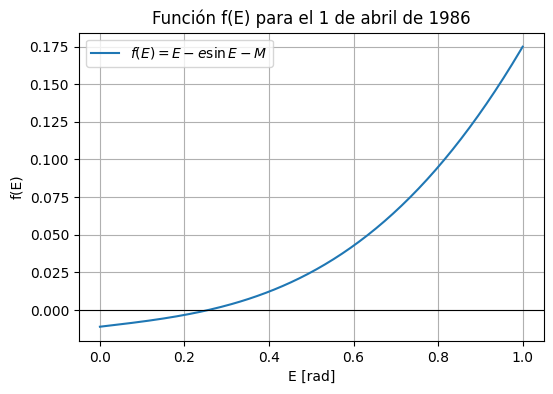

E (Newton)  = 0.25755425 rad
E (Secante) = 0.25755425 rad


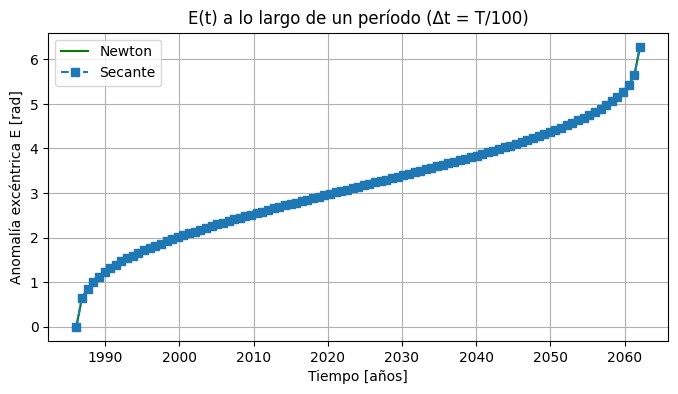

In [24]:
# Parámetros del cometa Halley
e = 0.9672671  # excentricidad
T = 75.96000  # periodo orbital en años
t0 = 1986.1113  # tiempo de perihelio (años)
# Fecha para el primer cálculo: 1 de abril de 1986
t_objetivo = 1986 + (31 + 28 + 31) / 365.25  # año + días transcurridos hasta abril


# Función que calcula M = anomalía media para un tiempo t
def anomalia_media(t):
    return 2 * np.pi / T * (t - t0)


# Función f(E) = E - e sin E - M
def f(E, M):
    return E - e * np.sin(E) - M


# Derivada de f respecto a E: f'(E) = 1 - e cos E
def df_dE(E):
    return 1 - e * np.cos(E)


# Metodo de Newton
def newton(M, E0, tol=1e-8, max_iter=50):
    E = E0
    for i in range(max_iter):
        delta = f(E, M) / df_dE(E)
        E -= delta
        if abs(delta) < tol:
            return E
    raise RuntimeError("Newton no convergió")


# Metodo de la secante
def secante(M, E0, E1, tol=1e-8, max_iter=50):
    Fa = f(E0, M)
    Fb = f(E1, M)
    for i in range(max_iter):
        E2 = E1 - Fb * (E1 - E0) / (Fb - Fa)  # fórmula secante
        if abs(E2 - E1) < tol:
            return E2
        E0, Fa = E1, Fb
        E1, Fb = E2, f(E2, M)
    raise RuntimeError("Secante no convergió")


# 1) Gráfica de f(E) en [0,1] y cálculo de E en la fecha objetivo
M_obj = anomalia_media(t_objetivo)
E_vals = np.linspace(0, 1, 200)
f_vals = f(E_vals, M_obj)

plt.figure(figsize=(6, 4))
plt.plot(E_vals, f_vals, label=r'$f(E)=E - e\sin E - M$')
plt.axhline(0, color='k', lw=0.8)
plt.xlabel('E [rad]')
plt.ylabel('f(E)')
plt.title('Función f(E) para el 1 de abril de 1986')
plt.legend()
plt.grid(True)
plt.show()

# Aproximamos E0=M como semilla inicial para Newton y secante
E0 = M_obj
E_newton = newton(M_obj, E0)
E_secante = secante(M_obj, E0, E0 + 0.5)  # segunda semilla arbitraria

print(f"E (Newton)  = {E_newton:.8f} rad")
print(f"E (Secante) = {E_secante:.8f} rad")

# 2) Evolución de E(t) en un período completo
n_puntos = 101
ts = t0 + np.linspace(0, T, n_puntos)  # tiempos desde perihelio
Ms = anomalia_media(ts)

# Arrays para almacenar resultados
Es_newton = np.zeros_like(ts)
Es_secante = np.zeros_like(ts)

# Condición inicial E(t0)=0
Es_newton[0] = 0.0
Es_secante[0] = 0.0

# Iteramos con Δt = T/100, usando la solución previa como semilla
for i in range(1, n_puntos):
    M_i = Ms[i]
    # Newton: semilla = E anterior
    Es_newton[i] = newton(M_i, Es_newton[i - 1])
    # Secante: semillas = E anterior y semilla un poco desplazada
    Es_secante[i] = secante(M_i, Es_secante[i - 1], Es_secante[i - 1] + 0.1)

# Gráfica comparativa E(t)
plt.figure(figsize=(8, 4))
plt.plot(ts, Es_newton, 'g-', label='Newton')
plt.plot(ts, Es_secante, 's--', label='Secante')
plt.xlabel('Tiempo [años]')
plt.ylabel('Anomalía excéntrica E [rad]')
plt.title('E(t) a lo largo de un período (Δt = T/100)')
plt.legend()
plt.grid(True)
plt.show()

# 2
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

$$
m(T) = \tanh\left( \frac{m(T)}{T} \right)
$$

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

- La magnetización reducida empleando el metodo de la secante y Newton-Raphson (Muestre su resultado con 4 cifras).

- Valide su respuestado con el metodo de punto fijo (Muestre su resultado con 4 cifras).

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los 100 valores de T.

m(T=0.5) secante = 0.9575
m(T=0.5) newton  = 0.9575
m(T=0.5) punto fijo = 0.9575


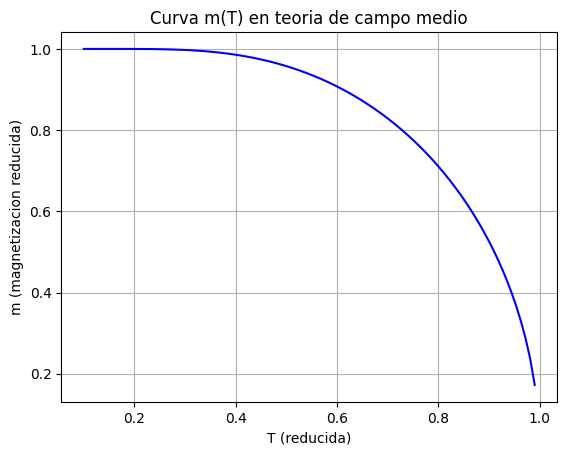

In [23]:
# definimos la funcion f(m; T) = tanh(m/T) - m
def magnetizacion_ecuacion(m, T):
    """
    f(m) = tanh(m/T) - m
    retorna valor de la ecuacion cuyo cero es la magnetizacion reducida
    """
    return np.tanh(m / T) - m

# derivada de f respecto a m, necesaria para Newton
def df_dm(m, T):
    """
    f'(m) = (1 - tanh^2(m/T))*(1/T) - 1
    """
    sech2 = 1.0 / np.cosh(m / T)**2
    return sech2 * (1.0 / T) - 1.0

# punto T fijo para probar
T0 = 0.5

# 1) raiz con metodo de la secante
sol_sec = root_scalar(
    lambda m: magnetizacion_ecuacion(m, T0),
    method='secant',
    x0=0.8, x1=1.0, xtol=1e-8
)
m_sec = sol_sec.root

# 2) raiz con metodo de Newton-Raphson
sol_newt = root_scalar(
    lambda m: magnetizacion_ecuacion(m, T0),
    fprime=lambda m: df_dm(m, T0),
    method='newton',
    x0=0.8, xtol=1e-8
)
m_newt = sol_newt.root

print(f"m(T=0.5) secante = {m_sec:.4f}")
print(f"m(T=0.5) newton  = {m_newt:.4f}")

# 3) metodo de punto fijo: m_{n+1} = tanh(m_n / T)
m_pf = 1.0            # semilla inicial
for i in range(50):   # iterar suficientes veces
    m_pf = np.tanh(m_pf / T0)
print(f"m(T=0.5) punto fijo = {m_pf:.4f}")

# 4) grafico de m(T) para 100 valores de T entre 0.1 y 0.99
Ts = np.linspace(0.1, 0.99, 100)
ms = []

for T in Ts:
    # resolver tanh(m/T) - m = 0 con secante
    sol = root_scalar(
        lambda m: magnetizacion_ecuacion(m, T),
        method='secant',
        x0=0.8, x1=0.99, xtol=1e-8
    )
    ms.append(sol.root)

# graficar curva de magnetizacion reducida vs temperatura
plt.plot(Ts, ms, 'b-')
plt.xlabel('T (reducida)')
plt.ylabel('m (magnetizacion reducida)')
plt.title('Curva m(T) en teoria de campo medio')
plt.grid(True)
plt.show()

# 3

La energía libre de Gibbs para 1 mol de hidrógeno a una temperatura $T$ está dada por:

$$G = -RT \ln \left[ \left( \frac{T}{T_0} \right)^{5/2} \right]$$

donde:  
- $ R = 8.314 \, \text{J/K} $ es la constante de los gases.  
- $ T_0 = 4.444 \, \text{J/K} $ es una constante de referencia.  

Determinar la temperatura $ T $ a la cual $ G = -10^5 \, \text{J}$.  



In [28]:
# constantes del problema
R_const    = 8.314        # constante de los gases [J/K]
T0_ref     = 4.444        # temperatura de referencia [K]
G_objetivo = -1e5         # energia libre de Gibbs objetivo [J]

def Gibbs(T):
    """
    energia libre de Gibbs para 1 mol de hidrogeno
    T : temperatura [K]
    retorna: G = -R_const * T * ln((T/T0_ref)**(5/2))
    """
    return -R_const * T * np.log((T / T0_ref)**2.5)

def f(T):
    """
    ecuacion f(T) = G(T) - G_objetivo
    T : temperatura [K]
    retorna: diferencia entre G(T) y G_objetivo [J]
    """
    return Gibbs(T) - G_objetivo

def df(T):
    """
    derivada de f con respecto a T
    T : temperatura [K]
    retorna: f'(T) = dG/dT = -R_const * [ ln((T/T0_ref)**2.5) + 2.5 ]
    """
    return -R_const * (np.log((T / T0_ref)**2.5) + 2.5)

# semilla inicial para Newton
T0 = 300.0       # [K]

# calculo de T resolviendo f(T)=0 con Newton-Raphson
T_newton = newton(f, T0, fprime=df, tol=1e-10, maxiter=100)

# calculo de T resolviendo f(T)=0 con metodo de la secante
secante = root_scalar(f,
                      method='secant',
                      x0=100.0,    # primer valor inicial [K]
                      x1=1000.0,   # segundo valor inicial [K]
                      xtol=1e-10,
                      maxiter=100)
T_secante = secante.root

print("Temperatura (Newton) : {:.6f} K".format(T_newton))
print("Temperatura (Secante): {:.6f} K".format(T_secante))

Temperatura (Newton) : 904.974341 K
Temperatura (Secante): 904.974341 K


# 4

La distribución de intensidad en la difracción de Fraunhofer por una rendija de ancho $W$ y altura infinita, iluminada con luz monocromática de longitud de onda $\lambda$, está dada por:

$$I(\theta) = I_0 \left[ \frac{\sin(\pi W \sin \theta / \lambda)}{\pi W \sin \theta / \lambda} \right]^2,$$

donde $\theta$ es el ángulo de observación respecto a la dirección incidente. Introduciendo la variable adimensional:

$$x = \pi W \sin \theta / \lambda,$$

la intensidad y su derivada se expresan como:

$$I(x) = I_0 \left( \frac{\sin x}{x} \right)^2, \quad I(0) = I_0,$$
$$I'(x) = \frac{2I_0}{x} \left( \cos x - \frac{\sin x}{x} \right) \frac{\sin x}{x}, \quad I'(0) = 0.$$

- Graficar $I(x)$ y $I'(x)$ en el intervalo $x \in [-10, 10]$.

- Calcular el valor $x_{1/2}$ (positivo) donde $I(x) = I_0/2 $, resolviendo la ecuación $I(x) - I_0/2 = 0 $ con el método de la secante y aproximación inicial $x_0 = \pi$.

- Encontrar los máximos locales $x_i \in [-10, 10]$ resolviendo $I'(x) = 0$.
- Usar un paso $h = 0.5 $ para separar raíces y aplicar el *método de la regula falsi* (falsa posición) para mantenerlas acotadas.

**Nota:**
Puede tomar $I_0=1 $.

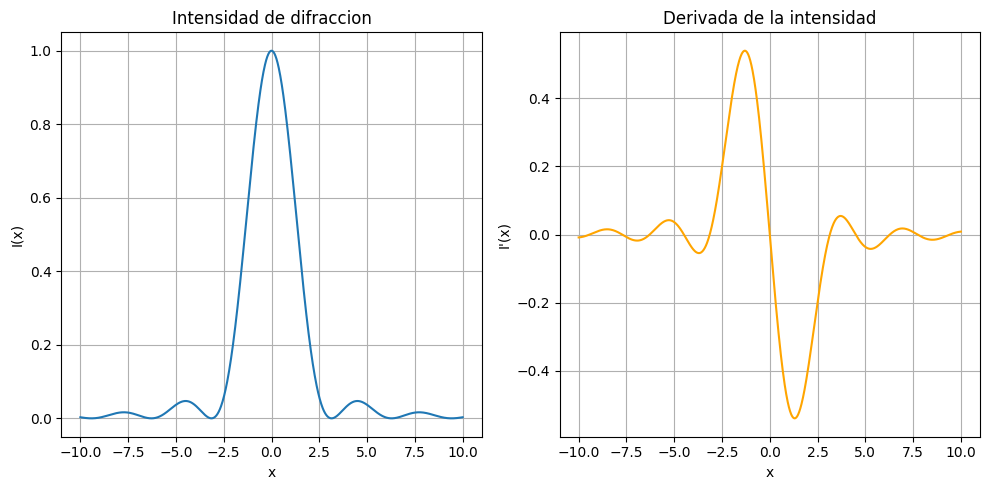

x1/2 (I(x)=0.5): None
Maximos locales xi en [-10,10]:
-9.424778908059865
-7.725251879794755
-6.283200785726028
-4.4934100239108865
-3.1415941163077403
3.1415941163077403
4.4934100239108865
6.283200785726028
7.725251879794755
9.424778908059865


In [29]:
# Definir intensidad de difraccion I(x) con I0 = 1
def I(x):
    # Para x = 0, retornamos limite I(0) = 1
    # En otro caso, usamos (sin x / x)^2
    if x == 0:
        return 1.0
    else:
        return (math.sin(x) / x)**2

# Derivada de I(x) segun la expresion dada
def Ip(x):
    # Para x = 0, I'(0) = 0
    if x == 0:
        return 0.0
    # I'(x) = 2 I0/x * (cos x - sin x/x) * sin x/x
    # con I0 = 1
    sinx = math.sin(x)
    cosx = math.cos(x)
    term = sinx / x
    return 2 * term / x * (cosx - term)

# Metodo de la secante para raiz de f, con x0 inicial y x1 inicial
def secante(f, x0, x1, tol=1e-6, max_iter=50):
    for i in range(max_iter):
        f0 = f(x0)
        f1 = f(x1)
        denom = (f1 - f0)
        if abs(denom) < 1e-12:
            break
        x2 = x1 - f1 * (x1 - x0) / denom
        if abs(x2 - x1) < tol:
            return x2
        x0, x1 = x1, x2
    return None

# Metodo de la falsa posicion (regula falsi) para raiz de f en [a,b]
def falsa_posicion(f, a, b, tol=1e-6, max_iter=50):
    fa = f(a)
    fb = f(b)
    if fa * fb > 0:
        return None
    for i in range(max_iter):
        # punto c segun regla de la falsa posicion
        c = (a * fb - b * fa) / (fb - fa)
        fc = f(c)
        if abs(fc) < tol:
            return c
        # mantener el intervalo que encierra la raiz
        if fa * fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
    return None

# 1) Graficar I(x) e Ip(x) en [-10,10]
xs = np.linspace(-10, 10, 1001)
Is = [I(x) for x in xs]
Ips = [Ip(x) for x in xs]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(xs, Is, label='I(x)')
plt.xlabel('x')
plt.ylabel('I(x)')
plt.title('Intensidad de difraccion')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(xs, Ips, label="I'(x)", color='orange')
plt.xlabel('x')
plt.ylabel("I'(x)")
plt.title('Derivada de la intensidad')
plt.grid(True)

plt.tight_layout()
plt.show()

# 2) Calcular x1/2 > 0 donde I(x) = 1/2 usando secante, x0 = pi, x1 = 4
# ecuacion f(x) = I(x) - 0.5
def f_half(x):
    return I(x) - 0.5

x0 = math.pi
x1 = math.pi + 1.0  # un poco desplazado
x_half = secante(f_half, x0, x1)
print("x1/2 (I(x)=0.5):", x_half)

# 3) Encontrar maximos locales resolviendo Ip(x) = 0 en [-10,10]
# Usamos falsa posicion para cada intervalo donde Ip cambia de signo
h = 0.5
maximos = []
a = -10.0
while a < 10.0:
    b = a + h
    if Ip(a) * Ip(b) < 0:
        root = falsa_posicion(Ip, a, b)
        if root is not None:
            maximos.append(root)
    a = b

# Filtrar unicos con tolerancia
maximos_unicos = []
for r in maximos:
    if all(abs(r - ru) > 1e-3 for ru in maximos_unicos):
        maximos_unicos.append(r)

print("Maximos locales xi en [-10,10]:")
for xi in maximos_unicos:
    print(xi)

# 5

La ley de Planck describe la densidad espectral de energía de la radiación electromagnética emitida por un cuerpo negro en equilibrio térmico (Toda et al., 1998):

$$u(\lambda,T)=\frac{8\pi hc}{\lambda^{5}}\,\frac{1}{\exp\left(hc/\left(\lambda k_{B}T\right)\right)-1},$$

donde:
- $T$ = temperatura de equilibrio (K)
- $\lambda$ = longitud de onda (m)
- $h=6.626 \times 10^{-34}$ J $\cdot$ s (constante de Planck)
- $k_{B}=1.381 \times 10^{-23}$ J$\cdot$K$^{-1}$ (constante de Boltzmann)
- $c=2.998 \times 10^{8}$ m$\cdot$s$^{-1}$ (velocidad de la luz)

Introduciendo las variables adimensionales:
$$x=\frac{\lambda}{\lambda_{0}}, \quad \lambda_{0}=\frac{hc}{k_{B}T}, \quad K=\frac{8\pi k_{B}T}{\lambda_{0}^{4}},$$

la ley se simplifica a:
$$u(\lambda,T)=K\frac{1}{x^{5}\left(e^{1/x}-1\right)}.$$

La derivada (para encontrar máximos):
$$\frac{\partial u}{\partial\lambda}=K\lambda_{0}\frac{5x+(1-5x)e^{1/x}}{x^{7}(e^{1/x}-1)^{2}}. $$

- Graficar $u(\lambda,T)$ y $\partial u/\partial\lambda$ para $T=4000, 5000, 6000$ K.

- Resolver $\partial u/\partial\lambda=0 $ para $T=5778 $ K con el método de Bisección y de Newton.

- Validar la ley de desplazamiento de Wien: $\lambda_{\rm max}T \approx 2.898 \times 10^{-3}$ m $\cdot$ K

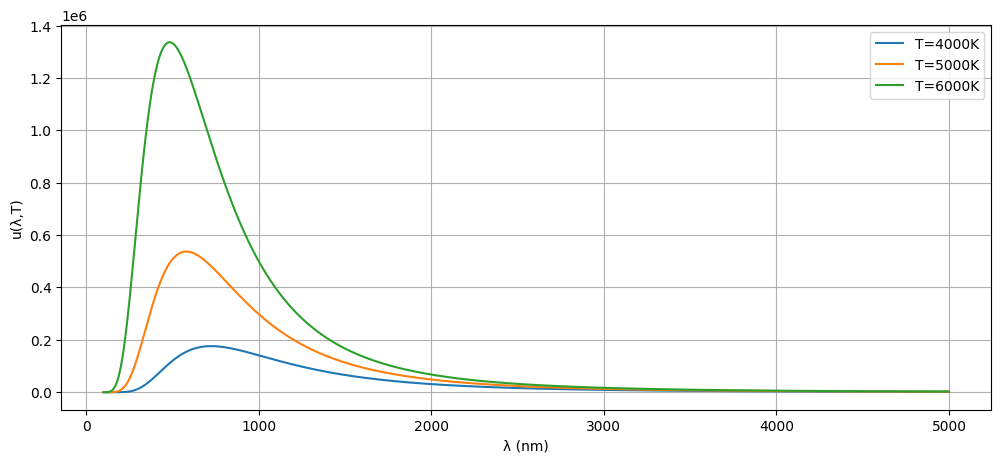

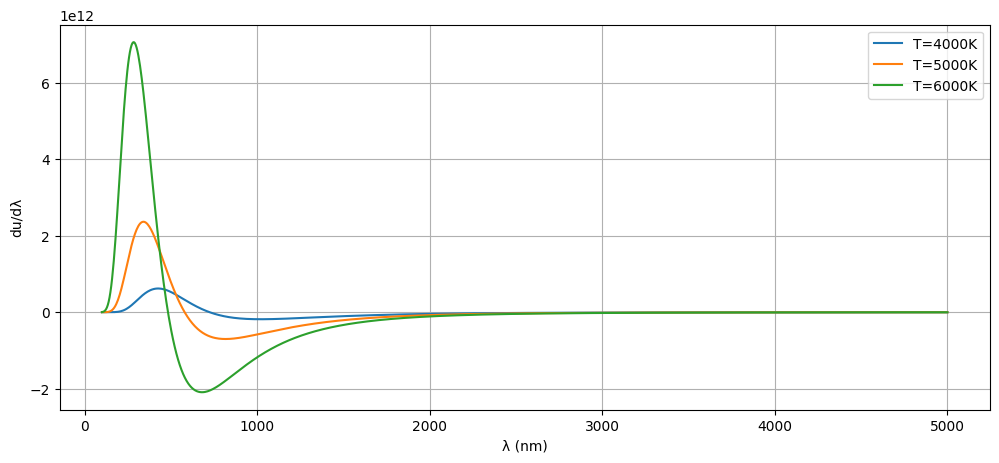

λ_max (bisección) = 5.013976e-07 m
λ_max (Newton)    = 5.013980e-07 m
Wien (bisección): 0.0028970754577875143 m·K
Wien (Newton):    0.0028970776570889753 m·K


In [30]:
# Constantes
h = 6.626e-34         # J·s
k_B = 1.381e-23       # J·K^-1
c = 2.998e8           # m·s^-1
pi = np.pi

def densidad_espectral(lambdas, T):
    """
    Versión vectorizada de u(lambda, T).
    lambdas: array de longitudes de onda (m)
    T: temperatura (K)
    """
    lambda0 = h * c / (k_B * T)
    K = 8 * pi * k_B * T / lambda0**4
    x = lambdas / lambda0

    # Para evitar overflow en exp(1/x) e invalidos, usamos errstate
    with np.errstate(over='ignore', invalid='ignore', divide='ignore'):
        ex = np.exp(1/x)
        u = K / (x**5 * (ex - 1))

    # donde x<=0 o ex infinita, ponemos u=0
    u = np.where((x > 0) & np.isfinite(u), u, 0.0)
    return u

def derivada_densidad(lambdas, T):
    """
    Versión vectorizada de du/dlambda.
    lambdas: array de longitudes de onda (m)
    T: temperatura (K)
    """
    lambda0 = h * c / (k_B * T)
    K = 8 * pi * k_B * T / lambda0**4
    x = lambdas / lambda0

    with np.errstate(over='ignore', invalid='ignore', divide='ignore'):
        ex = np.exp(1/x)
        numer = 5*x + (1 - 5*x)*ex
        denom = x**7 * (ex - 1)**2
        du = (K / lambda0) * numer / denom

    # donde x<=0 o du no es finito, ponemos 0
    du = np.where((x > 0) & np.isfinite(du), du, 0.0)
    return du

# Ejemplo de uso: graficar para T=4000,5000,6000 K
temperaturas = [4000, 5000, 6000]
lambdas = np.linspace(1e-7, 5e-6, 1000)  # 100 nm a 5000 nm

plt.figure(figsize=(12,5))
for T in temperaturas:
    plt.plot(lambdas*1e9, densidad_espectral(lambdas, T), label=f"T={T}K")
plt.xlabel("λ (nm)")
plt.ylabel("u(λ,T)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
for T in temperaturas:
    plt.plot(lambdas*1e9, derivada_densidad(lambdas, T), label=f"T={T}K")
plt.xlabel("λ (nm)")
plt.ylabel("du/dλ")
plt.legend()
plt.grid(True)
plt.show()

T_sol = 5778.0  # K

# f(lambda) = du/dlambda evaluada en T_sol, devuelve escalar
def f_lambda(lam):
    return derivada_densidad(np.array([lam]), T_sol)[0]

# derivada numérica de f_lambda para Newton
def fprime_lambda(lam):
    eps = 1e-8
    return (f_lambda(lam+eps) - f_lambda(lam-eps)) / (2*eps)

# intervalo que encierra el máximo
a, b = 1e-7, 5e-6

# 1) Raíz con bisección usando root_scalar
res_bisec = root_scalar(
    f_lambda,
    method='bisect',
    bracket=[a, b],
    xtol=1e-12,
    maxiter=100
)
lambda_bisec = res_bisec.root
print(f"λ_max (bisección) = {lambda_bisec:.6e} m")

# 2) Raíz con Newton usando root_scalar y derivada numérica
# semilla inicial según la ley de Wien
lambda_guess = 2.898e-3 / T_sol
res_newton = root_scalar(
    f_lambda,
    method='newton',
    x0=lambda_guess,
    fprime=fprime_lambda,
    xtol=1e-12,
    maxiter=50
)
lambda_newton = res_newton.root
print(f"λ_max (Newton)    = {lambda_newton:.6e} m")

# 3) Validacion de la ley de Wien
print("Wien (bisección):", lambda_bisec * T_sol, "m·K")
print("Wien (Newton):   ", lambda_newton * T_sol, "m·K")


# 6

Considere un pozo de potencial cuadrado de ancho $w$, con paredes de altura $V$:

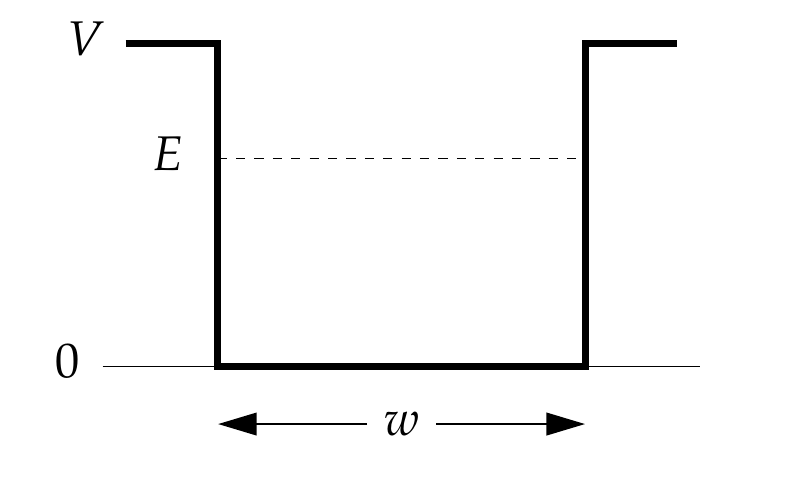

Usando la ecuación de Schrödinger, se puede demostrar que las energías permitidas $E$ de una partícula cuántica de masa $m$ atrapada en el pozo son soluciones de:

$$\tan \sqrt{w^2 m E / 2 \hbar^2} = 
\begin{cases} 
\sqrt{(V - E) / E} & \text{para los estados pares, } \\
-\sqrt{E / (V - E)} & \text{para los estados impares,}
\end{cases}$$

donde los estados se numeran comenzando desde 0, siendo el estado base el estado 0, el primer estado excitado el estado 1, y así sucesivamente.

- Para un electrón (masa $ 9.11 \times 10^{-31} \, \text{kg} $) en un pozo con $ V = 20 \, \text{eV} $ y $ w = 1 \, \text{nm} $, escriba un programa en Python para graficar las tres cantidades:

$$y_1 = \tan \sqrt{w^2 m E / 2 \hbar^2}, \quad y_2 = \sqrt{\frac{V - E}{E}}, \quad y_3 = -\sqrt{\frac{E}{V - E}},$$

en el mismo gráfico, como función de $ E $ desde $ E = 0 $ hasta $ E = 20 \, \text{eV} $. A partir de su gráfico, haga estimaciones aproximadas de las energías de los primeros seis niveles de energía de la partícula.

- Escriba un segundo programa para calcular los valores de los primeros seis niveles de energía en electrón-voltios con una precisión de $ 0.001 \, \text{eV} $ usando el método de la bisección.

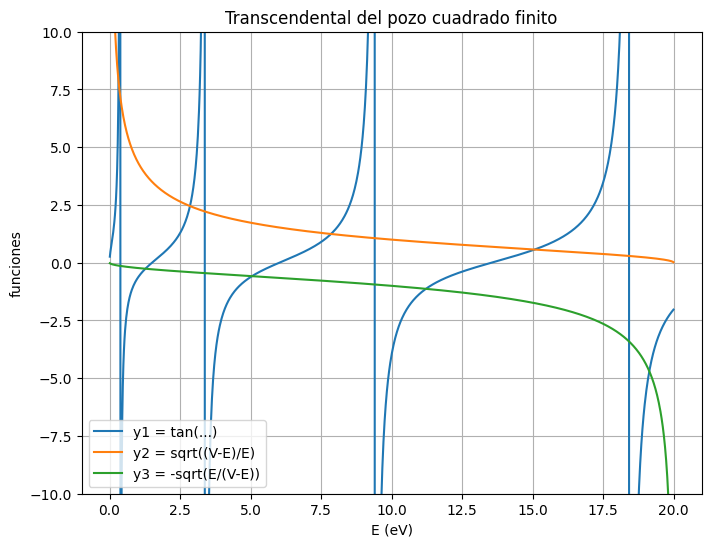

Primeros seis niveles de energia (eV):
  nivel 0 : 0.318 eV
  nivel 1 : 0.376 eV
  nivel 2 : 0.376 eV
  nivel 3 : 1.269 eV
  nivel 4 : 2.851 eV
  nivel 5 : 3.384 eV


In [31]:
# constantes del problema
hbar    = 1.0545718e-34   # constante reducida de Planck [J·s]
m_e     = 9.11e-31        # masa del electron [kg]
eV_to_J = 1.602176634e-19 # factor de conversion eV -> J
w       = 1e-9            # ancho del pozo [m]
V0_eV   = 20.0            # altura del pozo en eV
V0      = V0_eV * eV_to_J # altura del pozo en J

def alpha(E_eV):
    """
    argumento de tan: sqrt(w^2 * m * E / (2*hbar^2))
    E_eV : energia [eV]
    retorna: argumento adimensional
    """
    E = E_eV * eV_to_J
    return np.sqrt(w**2 * m_e * E / (2 * hbar**2))

def y1(E_eV):
    """
    y1(E) = tan(alpha(E))
    """
    return np.tan(alpha(E_eV))

def y2(E_eV):
    """
    y2(E) = sqrt((V0 - E)/E)
    """
    E = E_eV * eV_to_J
    return np.sqrt((V0 - E) / E)

def y3(E_eV):
    """
    y3(E) = - sqrt(E/(V0 - E))
    """
    E = E_eV * eV_to_J
    return -np.sqrt(E / (V0 - E))

# rango de energias para graficar [eV]
E_vals = np.linspace(0.01, V0_eV - 0.01, 1000)

# evaluamos curvas
y1_vals = y1(E_vals)
y2_vals = y2(E_vals)
y3_vals = y3(E_vals)

# grafica conjunta de y1, y2, y3
plt.figure(figsize=(8,6))
plt.plot(E_vals, y1_vals, label='y1 = tan(...)')
plt.plot(E_vals, y2_vals, label='y2 = sqrt((V-E)/E)')
plt.plot(E_vals, y3_vals, label='y3 = -sqrt(E/(V-E))')
plt.ylim(-10, 10)               # limitar eje y para legibilidad
plt.xlabel('E (eV)')
plt.ylabel('funciones')
plt.title('Transcendental del pozo cuadrado finito')
plt.legend()
plt.grid(True)
plt.show()

# definimos funciones para biseccion
def f_even(E_eV):
    return y1(E_eV) - y2(E_eV)

def f_odd(E_eV):
    return y1(E_eV) - y3(E_eV)

# busca intervalos donde cambia signo
def find_brackets(f, E_array):
    """
    encuentra pares (a,b) donde f(a)*f(b)<0
    """
    brackets = []
    f_vals = f(E_array)
    for i in range(len(E_array)-1):
        if np.isfinite(f_vals[i]) and np.isfinite(f_vals[i+1]):
            if f_vals[i] * f_vals[i+1] < 0:
                brackets.append((E_array[i], E_array[i+1]))
    return brackets

# obtenemos intervalos para pares e impares
brackets_even = find_brackets(f_even, E_vals)
brackets_odd  = find_brackets(f_odd,  E_vals)

# calculo de los primeros 6 niveles (3 pares + 3 impares)
levels = []
tol_eV = 1e-3

# resolvemos con biseccion en cada intervalo, hasta 6 niveles
i_even = i_odd = 0
while len(levels) < 6:
    # turno par si energia menor en bracket
    if i_even < len(brackets_even):
        a, b = brackets_even[i_even]
        sol = root_scalar(f_even, bracket=(a,b), method='bisect', xtol=tol_eV)
        levels.append(sol.root)
        i_even += 1
    if len(levels) >= 6:
        break
    if i_odd < len(brackets_odd):
        a, b = brackets_odd[i_odd]
        sol = root_scalar(f_odd, bracket=(a,b), method='bisect', xtol=tol_eV)
        levels.append(sol.root)
        i_odd += 1

levels.sort()  # orden ascendente

# imprimir resultados
print("Primeros seis niveles de energia (eV):")
for n, E_n in enumerate(levels):
    print(f"  nivel {n} : {E_n:.3f} eV")

# 7

Existe un punto entre la Tierra y la Luna, llamado punto de Lagrange $L_1$, donde un satélite orbitará la Tierra en perfecta sincronía con la Luna, permaneciendo siempre entre ambas. Esto funciona porque la atracción hacia adentro de la Tierra y la atracción hacia afuera de la Luna se combinan para crear exactamente la fuerza centrípeta necesaria que mantiene al satélite en su órbita.

Asumiendo órbitas circulares y que la Tierra es mucho más masiva que la Luna o el satélite, la distancia $r$ desde el centro de la Tierra hasta el punto $L_1$ satisface:

$$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,$$

donde $M$ y $m$ son las masas de la Tierra y la Luna respectivamente, $G$ es la constante gravitacional de Newton y $ \omega $ es la velocidad angular tanto de la Luna como del satélite.

- La ecuación anterior es una ecuación polinómica de quinto grado en $r$ (también llamada ecuación quíntica). Este tipo de ecuaciones no puede resolverse exactamente en forma cerrada, pero es sencillo resolverlas numéricamente. Escriba un programa que use el método de Newton o el método de la secante para resolver la distancia $r$ desde la Tierra hasta el punto $L_1$.

Los valores de los diversos parámetros son:

$$G = 6.674 \times 10^{-11} \, \text{m}^3 \text{kg}^{-1} \text{s}^{-2},$$

$$M = 5.974 \times 10^{24} \, \text{kg},$$

$$m = 7.348 \times 10^{22} \, \text{kg},$$

$$R = 3.844 \times 10^8 \, \text{m},$$

$$\omega = 2.662 \times 10^{-6} \, \text{s}^{-1}.$$

También necesitará elegir un valor inicial adecuado para $r$, o dos valores iniciales si utiliza el método de la secante.

Distancia L1 (Newton) : 3.260451e+08 m
Distancia L1 (Secante): 3.260451e+08 m


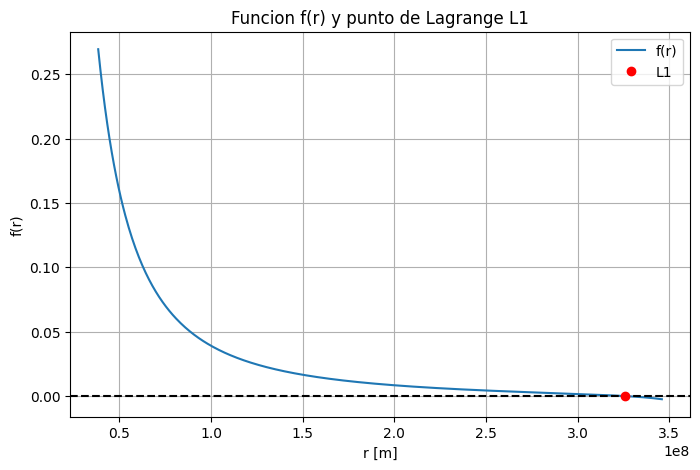

In [32]:
# -------------------------------------------------------------------
# Constantes fisicas del problema
# -------------------------------------------------------------------
G = 6.674e-11             # constante gravitacional [m^3 kg^-1 s^-2]
earth_mass = 5.974e24     # masa de la Tierra [kg]
moon_mass  = 7.348e22     # masa de la Luna [kg]
earth_moon_dist = 3.844e8 # distancia Tierra-Luna [m]
ang_vel = 2.662e-6        # velocidad angular de la orbita [s^-1]

def f_l1(r):
    """
    Funcion f(r) para hallar el punto de Lagrange L1.
    Entrada:
      r : float
          Distancia desde el centro de la Tierra al punto L1 [m]
    Salida:
      float
          Valor de f(r) = GM/r^2 - Gm/(R-r)^2 - omega^2 * r
    """
    term_earth = G * earth_mass / r**2
    term_moon  = G * moon_mass  / (earth_moon_dist - r)**2
    centripetal = ang_vel**2 * r
    return term_earth - term_moon - centripetal

def df_l1(r):
    """
    Derivada de f_l1 con respecto a r.
    Entrada:
      r : float
          Distancia [m]
    Salida:
      float
          Valor de f'(r) = -2GM/r^3 - 2Gm/(R-r)^3 - omega^2
    """
    d_earth = -2 * G * earth_mass / r**3
    d_moon  = -2 * G * moon_mass  / (earth_moon_dist - r)**3
    d_cent  = -ang_vel**2
    return d_earth + d_moon + d_cent

def find_l1_newton(initial_r, tol=1e-12, maxiter=100):
    """
    Calcula la posicion L1 usando el metodo de Newton.
    Entrada:
      initial_r : float
          Valor inicial para la iteracion [m]
      tol       : float
          Tolerancia para la convergencia
      maxiter   : int
          Numero maximo de iteraciones
    Salida:
      float
          Raiz de f_l1, es decir, distancia L1 [m]
    """
    return newton(f_l1, initial_r, fprime=df_l1,
                  tol=tol, maxiter=maxiter)

def find_l1_secant(r0, r1, tol=1e-12, maxiter=100):
    """
    Calcula la posicion L1 usando el metodo de la secante.
    Entrada:
      r0, r1 : floats
          Dos aproximaciones iniciales para la secante [m]
      tol     : float
          Tolerancia absoluta para la convergencia
      maxiter : int
          Numero maximo de iteraciones
    Salida:
      float
          Raiz de f_l1, es decir, distancia L1 [m]
    """
    sol = root_scalar(f_l1,
                      x0=r0, x1=r1,
                      method='secant',
                      xtol=tol,      # usa xtol en lugar de tol
                      maxiter=maxiter)
    return sol.root

def plot_f_and_root(r_root):
    """
    Grafica la funcion f_l1(r) y marca la raiz encontrada.
    Entrada:
      r_root : float
          Valor de la raiz L1 [m]
    """
    r_vals = np.linspace(0.1*earth_moon_dist,
                         0.9*earth_moon_dist, 500)
    f_vals = [f_l1(rv) for rv in r_vals]

    plt.figure(figsize=(8,5))
    plt.plot(r_vals, f_vals, label='f(r)')
    plt.axhline(0, color='k', linestyle='--')
    plt.plot(r_root, 0, 'ro', label='L1')
    plt.xlabel('r [m]')
    plt.ylabel('f(r)')
    plt.title('Funcion f(r) y punto de Lagrange L1')
    plt.legend()
    plt.grid(True)
    plt.show()

# -------------------------------------------------------------------
# EJEMPLO DE USO (sin main)
# -------------------------------------------------------------------

# aproximacion inicial basada en formula analitica aproximada
r_estimate = earth_moon_dist * (moon_mass / (3*earth_mass))**(1/3)

# calculo de L1 con Newton
r_l1_newton = find_l1_newton(r_estimate)

# calculo de L1 con secante
r_l1_secant = find_l1_secant(r_estimate*0.8, r_estimate*1.2)

# mostrar resultados
print(f"Distancia L1 (Newton) : {r_l1_newton:.6e} m")
print(f"Distancia L1 (Secante): {r_l1_secant:.6e} m")

# grafica la funcion y la raiz obtenida (por ejemplo usando Newton)
plot_f_and_root(r_l1_newton)